In [1]:
import numpy as np
import matplotlib.pyplot as plt

def redpr(str):
    print('\x1b[31m' + str + '\x1b[0m')

In [2]:
lines = np.arange(-40, 41)
siz = len(lines)
data_all = np.zeros((siz, 7))
data_all[:, 0] = lines

conv_kernel = 6

leagues = ['Premier2018', 'Championship2018', 'SerieA2018', 'LaLiga2018', 'LigueUn2018']
start_week = [20, 24, 19, 18, 20]
end_week = [22, 27, 19, 19, 20] 

In [3]:
len(lines)

81

In what follows y denotes the spread:

### league: Premier2018
week: 20
week: 21
week: 22

### league: Championship2018
week: 24
week: 25
week: 26
week: 27

### league: SerieA2018
week: 19

### league: LaLiga2018
week: 18
week: 19

### league: LigueUn2018
week: 20

### TOTAL:

1 bin:

-40<= y < 40:  d.pts:   117    win:    50   X:    29   loss:    38
               percentages     win:  0.43   X:  0.25   loss:  0.32   1X:  0.68   X2:  0.57
               odds            win:  2.34   X:  4.03   loss:  3.08   1X:  1.48   X2:  1.75
       >=2 goals difference in win:    23  percentage:  0.20  odds:  5.09
       <=-2 goals difference in loss:    15  percentage:  0.13  odds:  7.80

all bins:

-34:  d.pts:     0    win:     0   X:     0   loss:     0
               percentages     win:   nan   X:   nan   loss:   nan   1X:   nan   X2:   nan
               odds            win:   nan   X:   nan   loss:   nan   1X:   nan   X2:   nan
       >=2 goals difference in win:     0  percentage:   nan  o

/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in double_scalars
/Use

Text(0,0.5,'Win Pct.')

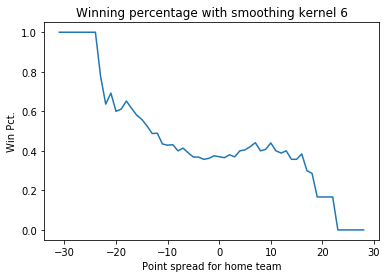

In [4]:
k = 0
print('In what follows y denotes the spread:')
for l in leagues:
    print()
    print('### league:', l)
    data = np.zeros((siz, 7))
    data[:, 0] = lines
    
    for wk in range(start_week[k], end_week[k] + 1):
        print('week:', wk)
        f = open(l + '/Week' + str(wk) + '/Results_w' + str(wk) + '.txt')
        Results = list(f)
        g = open(l + '/Week' + str(wk) + '/Lines_w' + str(wk) + '.txt')
        Lines = list(g)

        for i in range(len(Results)):
            j1 = Results[i].index('\t')
            j2 = Results[i].index('\t', j1 + 1)
            j3 = Results[i].index('\t', j2 + 1)
            home = int(Results[i][j2 + 1])
            away = int(Results[i][j3 - 2])
            line1 = float(Lines[i][0:4])
            line2 = int(line1*10)
            #print(home, away, line1, line2)
            ind = lines == line2
            #print(ind)
            data[ind, 1] += 1.
            data_all[ind, 1] += 1.
            if home - away > 0:
                data[ind, 2] += 1.
                data_all[ind, 2] += 1.
                if home - away >= 2:
                    data[ind, 5] += 1.
                    data_all[ind, 5] += 1.  
            elif home - away < 0:
                data[ind, 4] += 1.
                data_all[ind, 4] += 1.
                if home - away <= -2:
                    data[ind, 6] += 1.
                    data_all[ind, 6] += 1.
            else:
                data[ind, 3] += 1.
                data_all[ind, 3] += 1.
        
        #print('data:')
        #print(data)
        #print()
        #print('data_all:')
        #print(data_all)
        #print()

        f.close()
        g.close()
    
    k += 1
    
print()
print('### TOTAL:')

# one bin:
games = np.sum(data_all[:, 1])
wins = np.sum(data_all[:, 2])
ties = np.sum(data_all[:, 3])
losses = np.sum(data_all[:, 4])
margin2 = np.sum(data_all[:, 5])
margin3 = np.sum(data_all[:, 6])
print()
print('1 bin:')
print()
redpr('{:3d}'.format(-40) + '<= y <' + '{:3d}'.format(40) + ':  d.pts: {0:5.0f}    win: {1:5.0f}   X: {2:5.0f}   loss: {3:5.0f}'.format(games, wins, ties, losses))
print('               percentages     win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}   1X: {4:5.2f}   X2: {5:5.2f}'.format(games, wins/games, ties/games, losses/games, (wins + ties)/games, (losses + ties)/games))
redpr('               odds            win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}   1X: {4:5.2f}   X2: {5:5.2f}'.format(games, games/wins, games/ties, games/losses, games/(wins + ties), games/(losses + ties)))
print('       >=2 goals difference in win: {0:5.0f}  percentage: {1:5.2f}  odds: {2:5.2f}'.format(margin2, margin2/games, games/margin2))
print('       <=-2 goals difference in loss: {0:5.0f}  percentage: {1:5.2f}  odds: {2:5.2f}'.format(margin3, margin3/games, games/margin3))
    
print()
print('all bins:')
x_data = []
y_data = []
for i in range(conv_kernel, len(lines) - conv_kernel):
    #print('i', i, np.arange(i - conv_kernel, i + conv_kernel + 1))
    games = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 1])
    wins = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 2])
    ties = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 3])
    losses = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 4])
    margin2 = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 5])
    margin3 = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 6])
    print()
    redpr('{:3d}'.format(lines[i]) + ':  d.pts: {0:5.0f}    win: {1:5.0f}   X: {2:5.0f}   loss: {3:5.0f}'.format(games, wins, ties, losses))
    print('               percentages     win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}   1X: {4:5.2f}   X2: {5:5.2f}'.format(games, wins/games, ties/games, losses/games, (wins + ties)/games, (losses + ties)/games))
    redpr('               odds            win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}   1X: {4:5.2f}   X2: {5:5.2f}'.format(games, games/wins, games/ties, games/losses, games/(wins + ties), games/(losses + ties)))
    print('       >=2 goals difference in win: {0:5.0f}  percentage: {1:5.2f}  odds: {2:5.2f}'.format(margin2, margin2/games, games/margin2))
    print('       <=-2 goals difference in loss: {0:5.0f}  percentage: {1:5.2f}  odds: {2:5.2f}'.format(margin3, margin3/games, games/margin3))
    
    x_data.append(lines[i])
    y_data.append(wins/games)
    
plt.plot(x_data, y_data)
plt.title('Winning percentage with smoothing kernel ' + str(conv_kernel))
plt.xlabel('Point spread for home team')
plt.ylabel('Win Pct.')